<a href="https://colab.research.google.com/github/Duraiprasanth25/bi-dashboards/blob/main/AtliQ_Hotels_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AtliQ Hotels Data Analysis Project

AtliQ Hotels is a luxury hotels chain in India spread across 4 cities, viz Mumbai, Delhi, Hyderabad and Banglore.

They are witnessing a drop in business and hence they have made available 3 months dataset from May 2022 to July 2022 for analysis. Data for August 2022 is separately given.

The objective of this notebook is to analyse thier data and present data driven insights.

## 1. Data Import and Data Exploration

## Datasets

We have 6 csv files

- dim_date.csv
- dim_hotels.csv
- dim_rooms.csv
- fact_aggregated_bookings.csv
- fact_bookings.csv
- new_data_august.csv

In [ ]:
import pandas as pd

### 1.1 Importing all datasets

In [ ]:
df_date = pd.read_csv("datasets/dim_date.csv")
df_hotels = pd.read_csv("datasets/dim_hotels.csv")
df_rooms = pd.read_csv("datasets/dim_rooms.csv")
df_agg_bookings = pd.read_csv("datasets/fact_aggregated_bookings.csv")
df_bookings = pd.read_csv("datasets/fact_bookings.csv")
df_august = pd.read_csv("datasets/new_data_august.csv")

### 1.2 Explore dim_date table

In [ ]:
#DataFrame
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [ ]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


- Format of the _date_ column is object. Needs to be converted to date.time
- Has no null values


In [ ]:
df_date['date'] = pd.to_datetime(df_date['date'], format='%d-%m-%y', errors='coerce')
df_date.dtypes

date        datetime64[ns]
mmm yy              object
week no             object
day_type            object
dtype: object

In [ ]:
df_date.date.min(), df_date.date.max()

(Timestamp('2022-05-01 00:00:00'), Timestamp('2022-07-31 00:00:00'))

Date in this table ranges from May 2022 to July 2022

In [ ]:
df_date['mmm yy'].value_counts()

mmm yy
May 22    31
Jul 22    31
Jun 22    30
Name: count, dtype: int64

### 1.3 Explore dim_hotels table

In [ ]:
df_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [ ]:
df_hotels.duplicated().sum()

np.int64(0)

- dim_hotels has no duplicate values.

In [ ]:
# no of unique properties/names/category/city
print("Unique counts related to 'dim_hotels' table")
for column in df_hotels.columns:
    print(f"{column} --> {df_hotels[column].nunique()}")

Unique counts related to 'dim_hotels' table
property_id --> 25
property_name --> 7
category --> 2
city --> 4


In [ ]:
# citywise number of properties
df_hotels.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

<Axes: xlabel='city'>

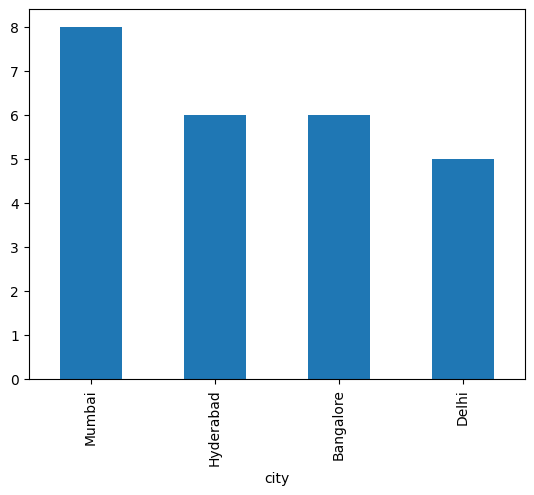

In [ ]:
df_hotels.city.value_counts().plot(kind="bar")

In [ ]:
#category_wise_count
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

- I has no duplicate values
- AtliQ hotels has __25 properties__ across __4 cities__ viz. Mumbai, Hyderabad, Bangalore & Delhi
- It has __16 luxury__ and __9 business__ properties.

## 1.4 Explore dim_rooms table

In [ ]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


- There are __4 types__ of rooms in AtliQ Hotels

### 1.5 Explore fact_aggregated_bookings data

In [ ]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [ ]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


- capacity column has two null values

In [ ]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


#### Q 1. Find out unique property ids in aggregate bookings dataset

In [ ]:
df_agg_bookings.property_id.unique(), df_agg_bookings.property_id.nunique()

(array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
        16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
        18561, 18562, 18563, 19559, 19561, 17564, 18560]),
 25)

#### Q 2. Find out total bookings per property_id

In [ ]:
df_agg_bookings.groupby("property_id").successful_bookings.sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

#### Q 3. Find out days on which bookings are greater than capacity

In [ ]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity].check_in_date

3        1-May-22
12       1-May-22
4136    11-Jun-22
6209     2-Jul-22
8522    25-Jul-22
9194    31-Jul-22
Name: check_in_date, dtype: object

#### Q 4. Find out properties that have highest capacity

In [ ]:
df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()].groupby("property_id")["capacity"].max()

property_id
17558    50.0
Name: capacity, dtype: float64

### 1.6 Explore fact_bookings data

In [ ]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [ ]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [ ]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


In [ ]:
df_bookings.duplicated().sum()

np.int64(0)

In [ ]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

- It doesn't have duplicated values
- It has 134590 unique entries of bookings
- Two columns ratings_given alone has 77907 null values and no_guests have 3 null values.
- Dates in the dataframe are in wrong format
- room_category in this df is room_id in df_rooms
- Some no_guests values are negative

In [ ]:
# unique booking platform

df_bookings.booking_platform.unique(), df_bookings.booking_platform.nunique()

(array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
        'journey', 'direct offline'], dtype=object),
 7)

In [ ]:
# value counts per booking id
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

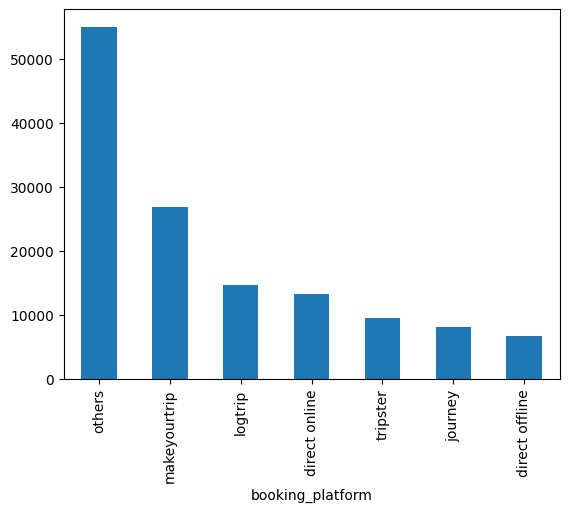

In [ ]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

<Axes: >

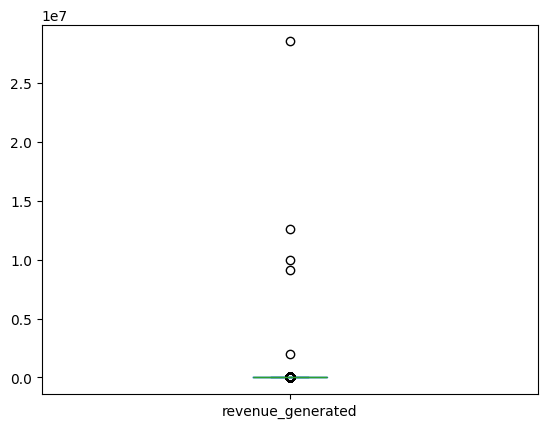

In [ ]:
# check outliers

df_bookings.revenue_generated.plot(kind = "box")

<Axes: >

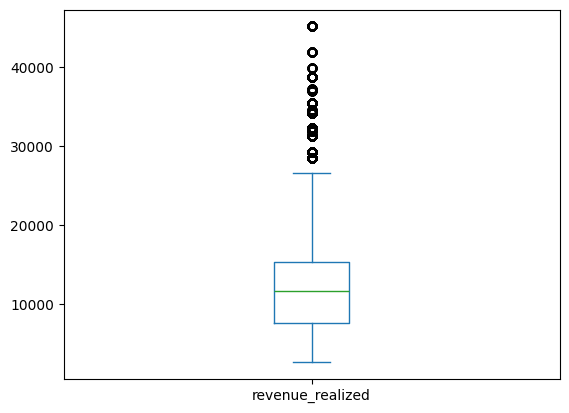

In [ ]:
df_bookings.revenue_realized.plot(kind = "box")


From Boxplots we can see outliers are there in revenue_generated and revenue_realized columns.

# 2.Data cleaning

In [ ]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


## 2.1 Cleaning invalid no_guests

In [ ]:
df_invalid_guests = df_bookings[(df_bookings.no_guests <= 0 ) | (df_bookings.no_guests.isnull())]
df_invalid_guests

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
30,May012216558RT213,16558,29-04-22,1/5/2022,2/5/2022,NaN,RT2,logtrip,4.0,Checked Out,12600,12600
43,May012216558RT35,16558,29-04-22,1/5/2022,4/5/2022,NaN,RT3,others,NaN,Checked Out,18480,18480
46,May012216558RT38,16558,27-04-22,1/5/2022,3/5/2022,NaN,RT3,makeyourtrip,NaN,Checked Out,16800,16800
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500


- Since the above errors are less than 0.5 % of total data, we can ignore those for insights genseration.

In [ ]:
df_bookings = df_bookings[(df_bookings.no_guests > 0) &  ~(df_bookings.no_guests.isnull())]
df_bookings.shape

(134578, 12)

## 2.2 Outlier removal in revenue_gnerated

In [ ]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [ ]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(np.float64(15378.036937686695), np.float64(13500.0))

In [ ]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
avg, std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [ ]:
higher_limit = avg + 3 * std
lower_limit = avg - 3 * std
higher_limit, lower_limit

(np.float64(294498.50173207896), np.float64(-263742.4278567056))

In [ ]:
outliers = df_bookings[df_bookings.revenue_generated > higher_limit]
outliers

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


- Since there no negative values in revenue_generated and there are five values greater than higher limit we can remove those outliers

In [ ]:
# removing_outliers

df_bookings = df_bookings[df_bookings.revenue_generated <= higher_limit]
df_bookings.shape

(134573, 12)

## 2.3 Outlier removal in revenue_realized

In [ ]:
df_bookings.revenue_realized.min(), df_bookings.revenue_realized.max()

(np.int64(2600), np.int64(45220))

In [ ]:
df_bookings.revenue_realized.mean(), df_bookings.revenue_realized.median()

(np.float64(12695.983585117372), np.float64(11700.0))

In [ ]:
avg,std = df_bookings.revenue_realized.mean(), df_bookings.revenue_realized.std()
avg, std

(np.float64(12695.983585117372), np.float64(6927.791692242814))

In [ ]:
higher_limit = avg + 3 * std
lower_limit = avg - 3 * std
higher_limit, lower_limit

(np.float64(33479.358661845814), np.float64(-8087.391491611072))

In [ ]:
outliers = df_bookings[(df_bookings.revenue_realized < lower_limit) | (df_bookings.revenue_realized > higher_limit)]
outliers

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [ ]:
df_bookings[df_bookings.revenue_realized > higher_limit].room_category.value_counts()

room_category
RT4    1299
Name: count, dtype: int64

- Since, all the values belongs to RT4 category, which is presidential suite from df_rooms, it's rent can be higher and fo fair analysis we need to do data analysis only on RT4 room type

In [ ]:
df_bookings[df_bookings.room_category == "RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [ ]:
RT4 = df_bookings[df_bookings.room_category == "RT4"].revenue_realized
avg, std = RT4.mean(), RT4.std()
higher_limit = avg + 3 * std
higher_limit

np.float64(50585.10567100048)

From this we can conclude that higher limit is 50585 and we have max value of 45220 for revenue_realized in our dataframe, we dont need to perform any data cleaning on this column.

## 2.4 Null values in ratings_given

It's logical that not every customers won't give reviews, it's okay to have null values in ratings_given column.

## 2.5 Null values in df_agg_bookings

Q) In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate substitute(possible ways is to use mean or median)

In [ ]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [ ]:
df_agg_bookings[df_agg_bookings.capacity.isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


#### Let's find out capacity for property_id 17561 & 17652 with room_type RT1

In [ ]:
df_agg_bookings.capacity.median()

np.float64(25.0)

In [ ]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace = True)
df_agg_bookings.loc[[8,14]]

C:\Users\THIRUMURUGAN\AppData\Local\Temp\ipykernel_23008\2322843452.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace = True)


,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


### 2.6 successful_bookings > capacity in df_agg_bookings

In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records

In [ ]:
df_agg_bookings.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity'],
      dtype='object')

In [ ]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


We have 6 records in df_agg_bookings where successful_bookings are greater than actual capacity, which show presence of data errors. It's better to filter out those rows from the dataframe for further analysis.

In [ ]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings <= df_agg_bookings.capacity]

In [ ]:
df_agg_bookings.shape

(9194, 5)

## 3. Data Transformation


### 3.1 Create occupancy percentage column

In [ ]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [ ]:
df_agg_bookings["occ_pct"] =  round(df_agg_bookings.successful_bookings * 100 / df_agg_bookings.capacity, 2)
df_agg_bookings.head(5)

C:\Users\THIRUMURUGAN\AppData\Local\Temp\ipykernel_23008\2008762237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_bookings["occ_pct"] =  round(df_agg_bookings.successful_bookings * 100 / df_agg_bookings.capacity, 2)


,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


### 3.2 cast dates to datetime format

In [ ]:
df_agg_bookings.dtypes

property_id              int64
check_in_date           object
room_category           object
successful_bookings      int64
capacity               float64
occ_pct                float64
dtype: object

In [ ]:
# df_agg_bookings['check_in_date'] = pd.to_datetime(df_agg_bookings['check_in_date'], format='%d-%b-%y', errors='coerce')
df_agg_bookings.loc[:, 'check_in_date'] = pd.to_datetime(df_agg_bookings['check_in_date'], format='%d-%b-%y', errors='coerce')
df_agg_bookings.dtypes

property_id                     int64
check_in_date          datetime64[ns]
room_category                  object
successful_bookings             int64
capacity                      float64
occ_pct                       float64
dtype: object

 ## 4. Insights Generation


#### What is an average occupancy rate in each of the room categories?

In [ ]:
df_agg_bookings.head(3)

In [ ]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean()

In [ ]:
df_rooms

In [ ]:
pd.merge(df_rooms, df_agg_bookings.groupby("room_category")["occ_pct"].mean(), left_on = "room_id", right_on = "room_category").sort_values("occ_pct")

### Print average occupancy rate per city

In [ ]:
df_hotels.head()

In [ ]:
df_agg_bookings_city =  pd.merge(df_agg_bookings, df_hotels[["property_id", "city"]], on="property_id", how = "left")
df_agg_bookings_city.groupby('city')["occ_pct"].mean()

### When was the occupancy better? Weekday or Weekend?

In [ ]:
df_date.head(3)

In [ ]:
df_agg_bookings.head(2)

In [ ]:
df_day_type = pd.merge(df_agg_bookings,df_date, left_on = "check_in_date", right_on = "date", how = "left")
df_day_type.groupby('day_type')["occ_pct"].mean().round(2)

### In the month of June, what is the occupancy for different cities?

In [ ]:
df_agg_bookings_city.check_in_date.dt.month

In [ ]:
df_june = df_agg_bookings_city[df_agg_bookings_city.check_in_date.dt.month == 6].groupby("city")["occ_pct"].mean().round(2)
df_june

In [ ]:
df_june.sort_values().plot(kind='barh')

 #### We got new data for the month of august. Append that to existing data

In [ ]:
df_august.head(3)

In [ ]:
df_august.columns

In [ ]:
print(df_agg_bookings.columns)
print(df_hotels.columns)
print(df_date.columns)

In [ ]:
df = pd.merge(df_agg_bookings, df_hotels, on="property_id", how = "left")
df = pd.merge(df, df_date, left_on = "check_in_date", right_on = "date").drop(columns=["date"])

df.head()

In [ ]:
#transformations on df_august
df_august.rename(columns = { 'occ%' : 'occ_pct'}, inplace = True)
df_august.check_in_date = pd.to_datetime(df_august.check_in_date)
df_august.drop(columns = ['room_class'], inplace = True)

df.shape,df_august.shape

In [ ]:
latest_df = pd.concat([df,df_august], ignore_index=True, axis=0)
latest_df.tail(10)

In [ ]:
latest_df.shape

 #### Print revenue realized per city

In [ ]:
df_bookings.head(3)

In [ ]:
df_bookings_city = pd.merge(df_bookings,df_hotels, on='property_id', how='left')
df_bookings_city.groupby("city")['revenue_realized'].sum()

#### Print month by month revenue

In [ ]:
df_bookings.info()

In [ ]:
df_bookings["check_in_date"] = pd.to_datetime(df_bookings["check_in_date"], errors='coerce')
df_bookings.dtypes

In [ ]:
df_bookings_date = pd.merge(df_bookings, df_date, left_on = 'check_in_date', right_on='date', how = 'left')
df_bookings_date.groupby('mmm yy')["revenue_realized"].sum()

### Print revenue realized per hotel type

In [ ]:
df_bookings_hotel_type = pd.merge(df_bookings, df_hotels, on = 'property_id', how = "left")
df_bookings_hotel_type.groupby("category")["revenue_realized"].sum()


### Print average revenue per city

In [ ]:
df_bookings_city.ratings_given.unique()

In [ ]:
df_bookings_city.groupby("city")["ratings_given"].mean()

### Print a pie chart of revenue realized per booking platform

<Axes: ylabel='revenue_realized'>

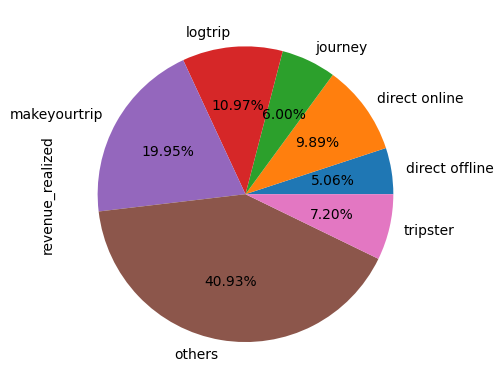

In [ ]:
df_rev_per_platform = df_bookings.groupby("booking_platform")["revenue_realized"].sum()
df_rev_per_platform.plot(kind = "pie", autopct = "%.2f%%")